<h1>The Beatles Songs Analysis Project</h1> 

<h2>Step 9. Song Titles and Words-Time Ratio</h2>

There are three songs parameters that have been analyzed in previous steps: track length, number of words in titles and number of words in lyrics. Let's see how they depend on each other.

In the <a href="http://www.hrutr.net/entries/tbsa-step-2-words-words-words">step 2</a> I plotted number of words in lyrics against length in seconds.

<Figure size 432x288 with 0 Axes>

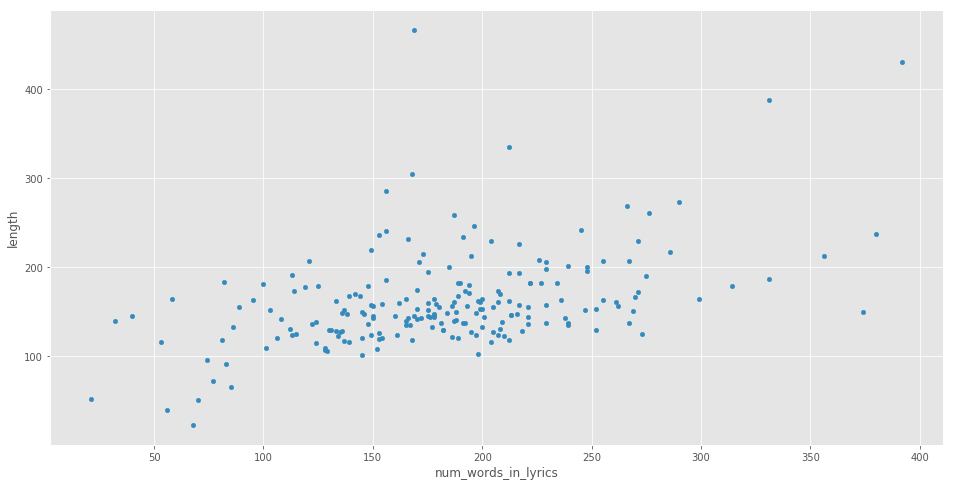

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# this allows plots to appear directly in the notebook
%matplotlib inline

# load data
df = pd.read_json('data.json')

# configure graphics 
plt.style.use('ggplot')
plt.figure()
df.plot.scatter(x='num_words_in_lyrics', y='length', figsize=(16, 8))

Let's try to make a <a href="https://en.wikipedia.org/wiki/Linear_regression">linear regression</a> model. Here I will use <a href="https://www.statsmodels.org/stable/index.html">statsmodel</a> python package.

In [2]:
import numpy as np
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [3]:
X = df['num_words_in_lyrics'].values
y = df['length'].values

X = sm.add_constant(X)

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.212
Model:                            OLS   Adj. R-squared:                  0.208
Method:                 Least Squares   F-statistic:                     55.45
Date:                Tue, 18 Dec 2018   Prob (F-statistic):           2.58e-12
Time:                        15:15:44   Log-Likelihood:                -1100.3
No. Observations:                 208   AIC:                             2205.
Df Residuals:                     206   BIC:                             2211.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         89.1173     10.316      8.639      0.0

So the equation for length would be number of words in lyrics * 0.39 + 90.6.

The R squared parameter (<a href="https://en.wikipedia.org/wiki/Coefficient_of_determination">coefficient of determination</a>) is only 0.2 It tells us how much of length variance can be explained if we know number of words in lyrics. So here R squared is not impressive; only 20%.

Let's see the resulting line.

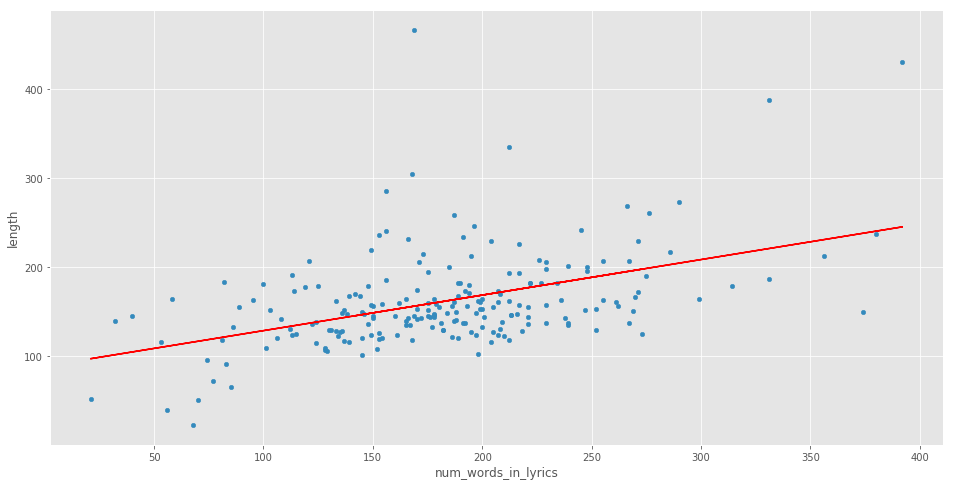

In [4]:
df['length_lr'] = results.params[1]*df['num_words_in_lyrics'] + results.params[0]
fig, ax = plt.subplots(figsize=(16, 8))
df.plot.scatter(x='num_words_in_lyrics', y='length', ax=ax)
ax.plot(df['num_words_in_lyrics'], df['length_lr'], color='Red')

But what if we split the dataset into originals and covers as we did before?

In [5]:
df_cover = df[df['cover']==True]
df_orig = df[df['cover']==False]

In [6]:
X = df_orig['num_words_in_lyrics']
y = df_orig['length']

X = sm.add_constant(X)

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 length   R-squared:                       0.230
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     54.50
Date:                Tue, 18 Dec 2018   Prob (F-statistic):           5.38e-12
Time:                        15:15:44   Log-Likelihood:                -978.46
No. Observations:                 184   AIC:                             1961.
Df Residuals:                     182   BIC:                             1967.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  84.5869    

We see that the result is somewhat better. Let's plot originals only.

/home/hrutr/.virtualenvs/tbsa/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


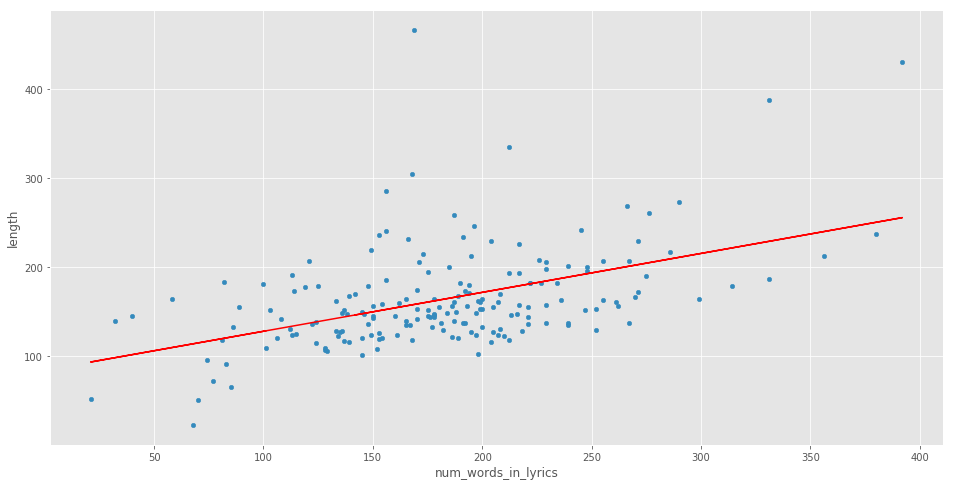

In [7]:
df_orig['length_lr'] = results.params[1]*df_orig['num_words_in_lyrics'] + results.params[0]
fig, ax = plt.subplots(figsize=(16, 8))
df_orig.plot.scatter(x='num_words_in_lyrics', y='length', ax=ax)
ax.plot(df_orig['num_words_in_lyrics'], df_orig['length_lr'], color='Red')

Now it's time for covers.

In [8]:
X = df_cover['num_words_in_lyrics']
y = df_cover['length']

X = sm.add_constant(X)

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 length   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     3.823
Date:                Tue, 18 Dec 2018   Prob (F-statistic):             0.0634
Time:                        15:15:45   Log-Likelihood:                -110.81
No. Observations:                  24   AIC:                             225.6
Df Residuals:                      22   BIC:                             228.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 115.6826    

/home/hrutr/.virtualenvs/tbsa/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


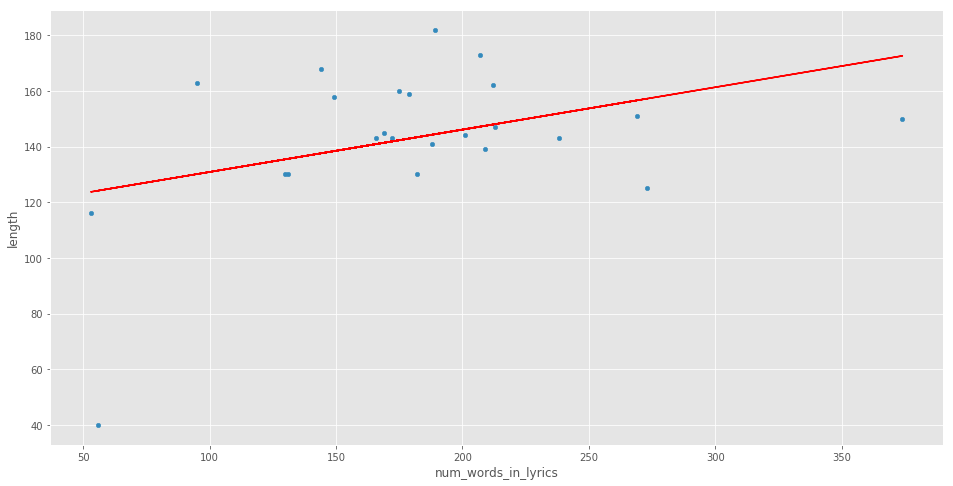

In [9]:
df_cover['length_lr'] = results.params[1] * df_cover['num_words_in_lyrics'] + results.params[0]
fig, ax = plt.subplots(figsize=(16, 8))
df_cover.plot.scatter(x='num_words_in_lyrics', y='length', ax=ax)
ax.plot(df_cover['num_words_in_lyrics'], df_cover['length_lr'], color='Red')

We see that for covers the result is actually worse; R squared is only 14.8%.

But we have the one parameter more; number of words in title. Let's remember how it is distributed.

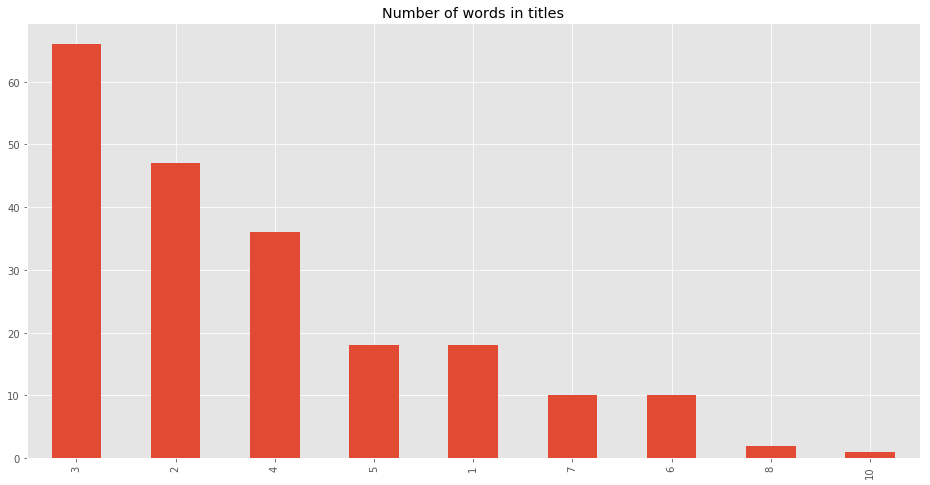

In [10]:
df['num_words_in_title'].value_counts().plot(kind='bar', figsize=(16, 8), title='Number of words in titles')

So we can split all songs into classes according to the number of words in their titles; let's neglect songs with 8 and 10 words in titles as their number is very small.

In [11]:
df = df[df['num_words_in_title'] < 8]

In [12]:
df_cover = df[df['cover']==True]
df_orig = df[df['cover']==False]

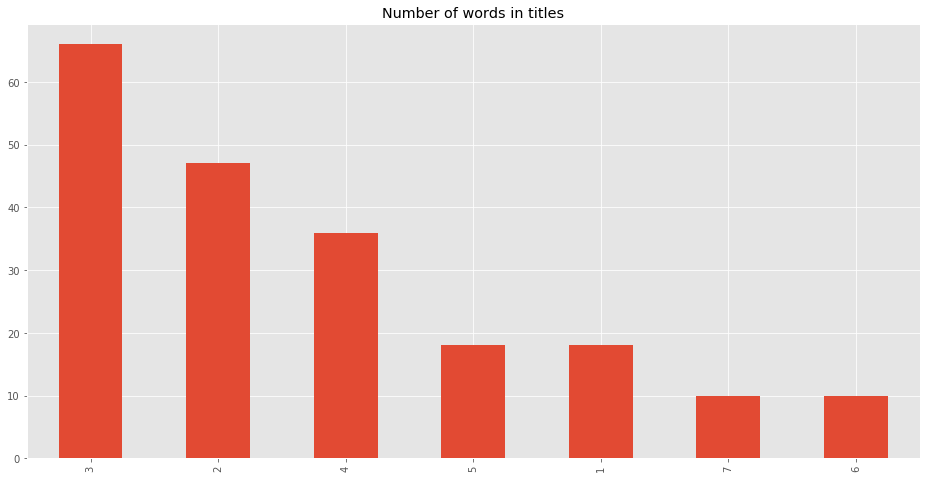

In [13]:
df['num_words_in_title'].value_counts().plot(kind='bar', figsize=(16, 8), title='Number of words in titles')

Now, every class has at least 10 songs. Maybe the songs in one or many class have some interesting distribution in the coordinates of lengths and number of words in lyrics? Let's see!

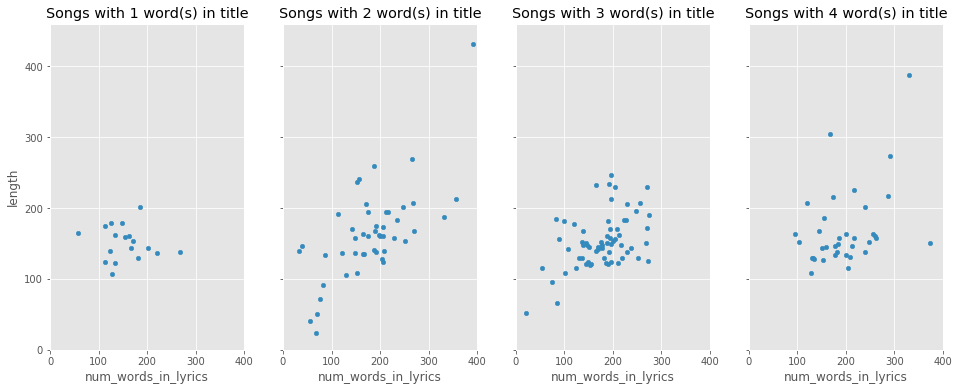

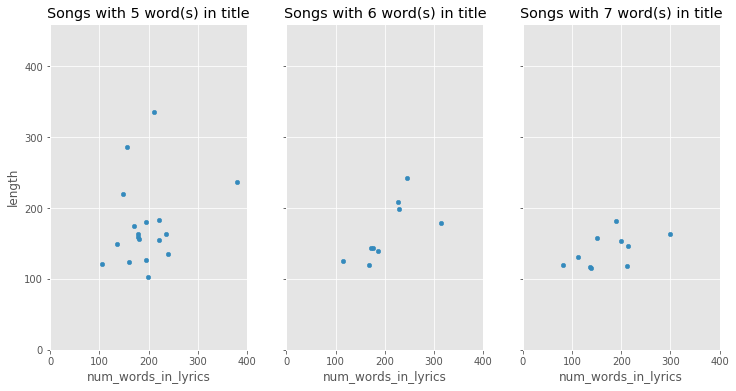

In [14]:
for i in range(1, 8, 4):
    if i+3 < 8:
        fig, axs = plt.subplots(1, 4, sharey=True, figsize=(16, 6))
    else:
        fig, axs = plt.subplots(1, 3, sharey=True, figsize=(12, 6))
        
    for ax in axs:
        ax.set_xlim(0, 400)
        ax.set_ylim(0, 460)
        
    df[df.num_words_in_title==i].plot.scatter(x='num_words_in_lyrics', y='length', ax=axs[0], 
                                              title='Songs with %i word(s) in title' % i)
    
    df[df.num_words_in_title==i+1].plot.scatter(x='num_words_in_lyrics', y='length', ax=axs[1], 
                                              title='Songs with %i word(s) in title' % (i+1))
    df[df.num_words_in_title==i+2].plot.scatter(x='num_words_in_lyrics', y='length', ax=axs[2], 
                                              title='Songs with %i word(s) in title' % (i+2))
    if i+3 < 8:
        df[df.num_words_in_title==i+3].plot.scatter(x='num_words_in_lyrics', y='length', ax=axs[3], 
                                              title='Songs with %i word(s) in title' % (i+3))    
        
    plt.show()

It seems that there is no patterns in these separate distributions either. But maybe there are patterns if we split the data into covers and originals, as we did before?

Let's check the covers first!

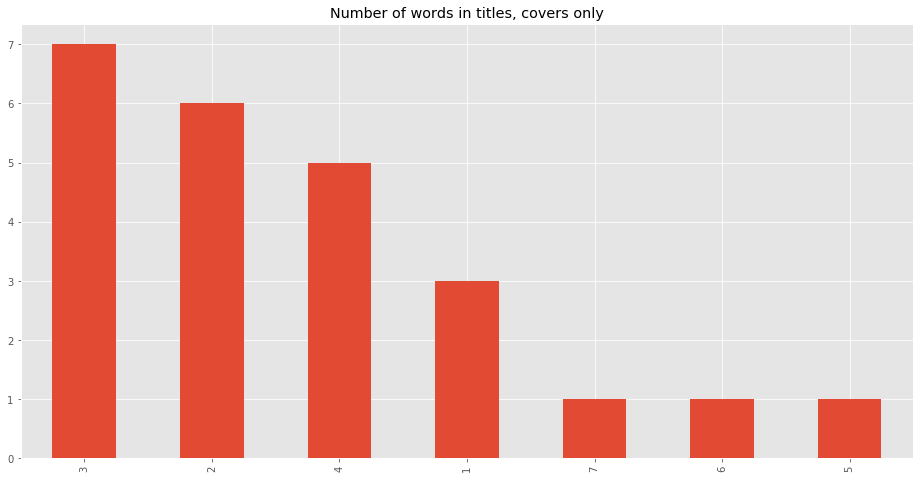

In [15]:
df_cover['num_words_in_title'].value_counts().plot(kind='bar', figsize=(16, 8), title='Number of words in titles, covers only')

We see that number of covers with the number of words in title more than 4 is negligible.

In [16]:
df_cover = df_cover[df_cover['num_words_in_title'] < 5]

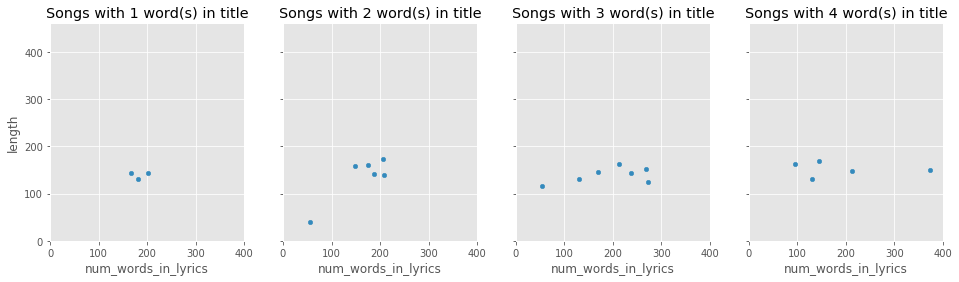

In [17]:
fig, axs = plt.subplots(1, 4, sharey=True, figsize=(16, 4))

for ax in axs:
    ax.set_xlim(0, 400)
    ax.set_ylim(0, 460)

for i in range(1, 5):
    df_cover[df_cover.num_words_in_title==i].plot.scatter(x='num_words_in_lyrics', y='length', ax=axs[i-1], 
                                              title='Songs with %i word(s) in title' % i)

We see that covers tend to be limited between 100 and 300 words in lyrics and between 100 and 200 seconds in every class.

Let's examine both length and number of words in songs according to the title class, i.e. to number of words in title.

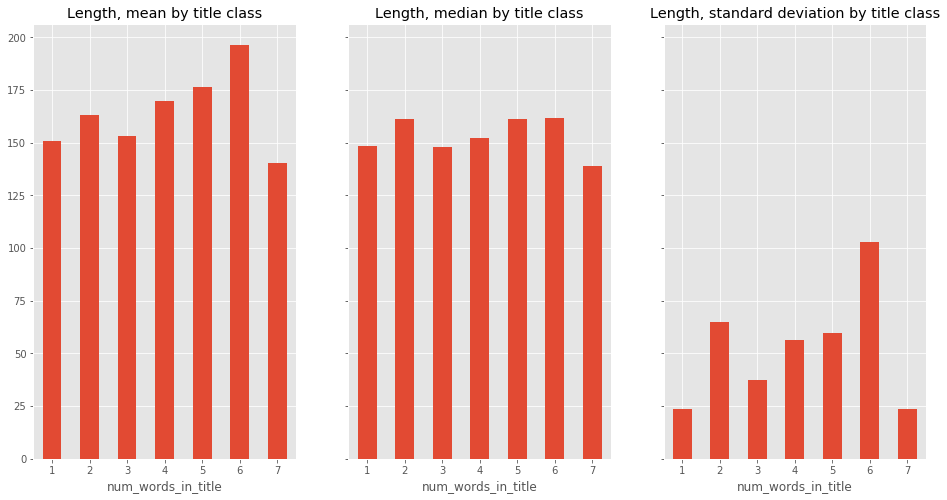

In [18]:
df_by_titles = df.groupby('num_words_in_title')
fig, axs = plt.subplots(1, 3, sharey=True)
axs[0].set_title('Length, mean by title class')
axs[1].set_title('Length, median by title class')
axs[2].set_title('Length, standard deviation by title class')
df_by_titles['length'].aggregate(np.mean).plot(kind='bar', ax=axs[0], figsize=(16, 8), rot=0)
df_by_titles['length'].aggregate(np.median).plot(kind='bar', ax=axs[1], rot=0)
df_by_titles['length'].aggregate(np.std).plot(kind='bar', ax=axs[2], rot=0)

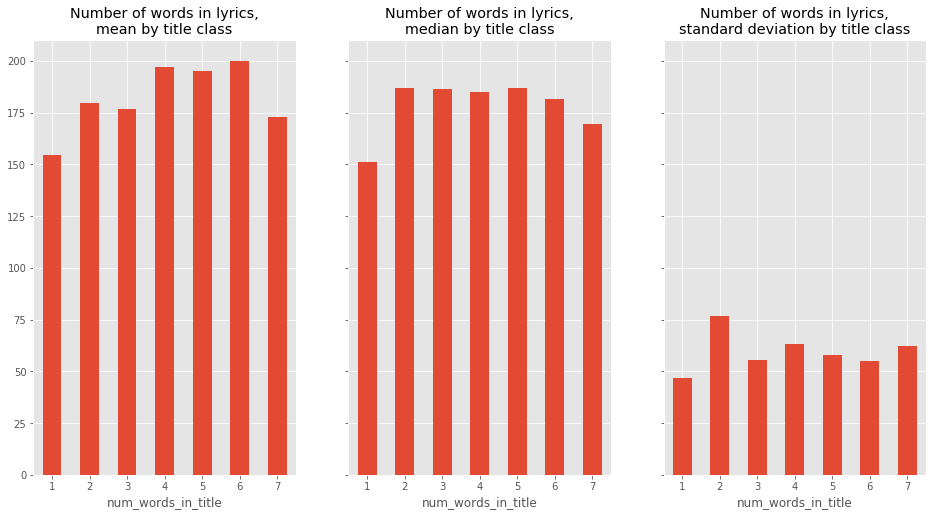

In [19]:
df_by_titles = df.groupby('num_words_in_title')
fig, axs = plt.subplots(1, 3, sharey=True)
axs[0].set_title('Number of words in lyrics,\nmean by title class')
axs[1].set_title('Number of words in lyrics,\nmedian by title class')
axs[2].set_title('Number of words in lyrics,\nstandard deviation by title class')
df_by_titles['num_words_in_lyrics'].aggregate(np.mean).plot(kind='bar', ax=axs[0], figsize=(16, 8), rot=0)
df_by_titles['num_words_in_lyrics'].aggregate(np.median).plot(kind='bar', ax=axs[1], rot=0)
df_by_titles['num_words_in_lyrics'].aggregate(np.std).plot(kind='bar', ax=axs[2], rot=0)

We see that both parameters tend to increase with increasing of number of words in titles, at least from 1 to 6. This trend is more pronounced in number of words and less so in length. What if we look at originals only?

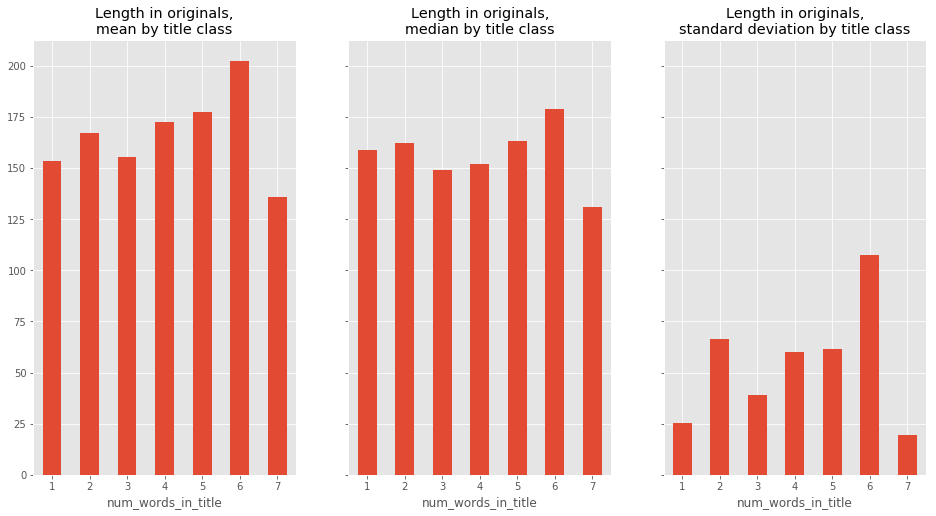

In [20]:
df_by_titles = df_orig.groupby('num_words_in_title')
fig, axs = plt.subplots(1, 3, sharey=True)
axs[0].set_title('Length in originals,\nmean by title class')
axs[1].set_title('Length in originals,\nmedian by title class')
axs[2].set_title('Length in originals,\nstandard deviation by title class')
df_by_titles['length'].aggregate(np.mean).plot(kind='bar', ax=axs[0], figsize=(16, 8), rot=0)
df_by_titles['length'].aggregate(np.median).plot(kind='bar', ax=axs[1], rot=0)
df_by_titles['length'].aggregate(np.std).plot(kind='bar', ax=axs[2], rot=0)

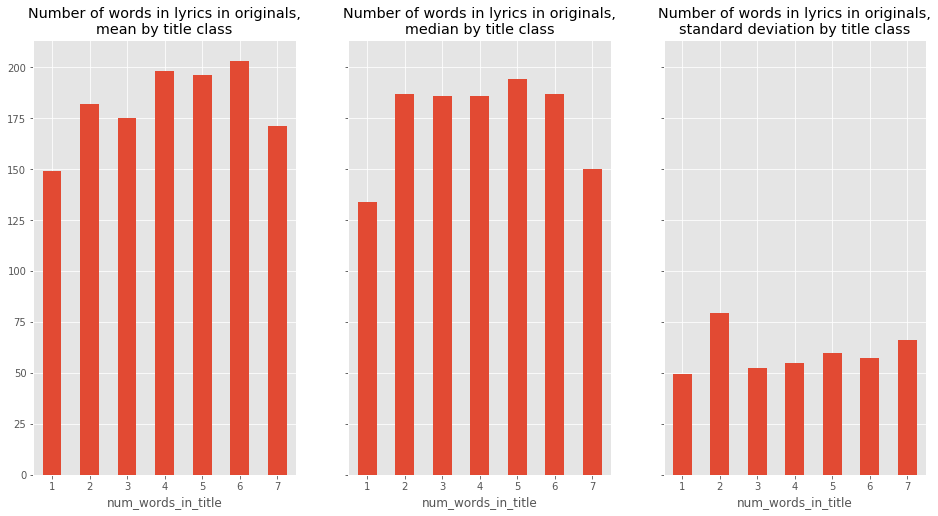

In [21]:
df_by_titles = df_orig.groupby('num_words_in_title')
fig, axs = plt.subplots(1, 3, sharey=True)
axs[0].set_title('Number of words in lyrics in originals,\nmean by title class')
axs[1].set_title('Number of words in lyrics in originals,\nmedian by title class')
axs[2].set_title('Number of words in lyrics in originals,\nstandard deviation by title class')
df_by_titles['num_words_in_lyrics'].aggregate(np.mean).plot(kind='bar', ax=axs[0], figsize=(16, 8), rot=0)
df_by_titles['num_words_in_lyrics'].aggregate(np.median).plot(kind='bar', ax=axs[1], rot=0)
df_by_titles['num_words_in_lyrics'].aggregate(np.std).plot(kind='bar', ax=axs[2], rot=0)

It's evident that the picture in originals is not much different to the common one. What about covers?

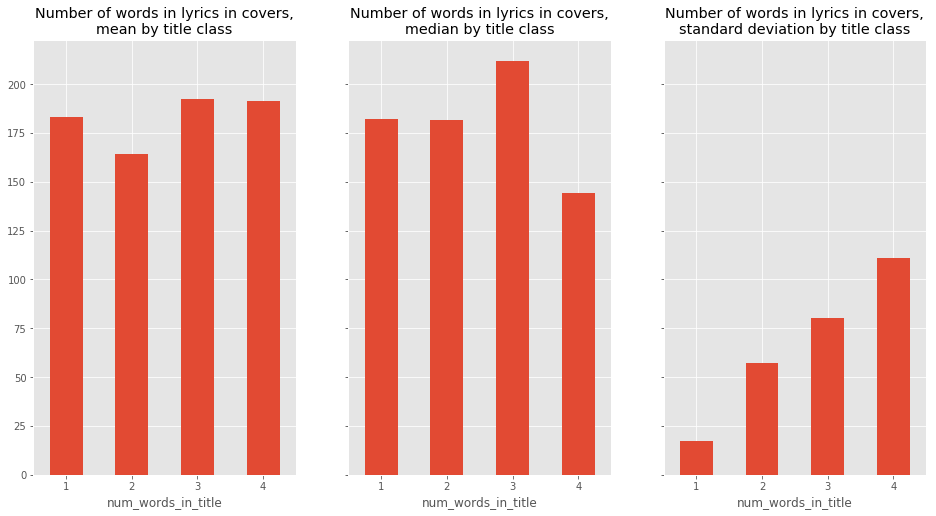

In [22]:
df_by_titles = df_cover.groupby('num_words_in_title')
fig, axs = plt.subplots(1, 3, sharey=True)
axs[0].set_title('Number of words in lyrics in covers,\nmean by title class')
axs[1].set_title('Number of words in lyrics in covers,\nmedian by title class')
axs[2].set_title('Number of words in lyrics in covers,\nstandard deviation by title class')
df_by_titles['num_words_in_lyrics'].aggregate(np.mean).plot(kind='bar', ax=axs[0], figsize=(16, 8), rot=0)
df_by_titles['num_words_in_lyrics'].aggregate(np.median).plot(kind='bar', ax=axs[1], rot=0)
df_by_titles['num_words_in_lyrics'].aggregate(np.std).plot(kind='bar', ax=axs[2], rot=0)

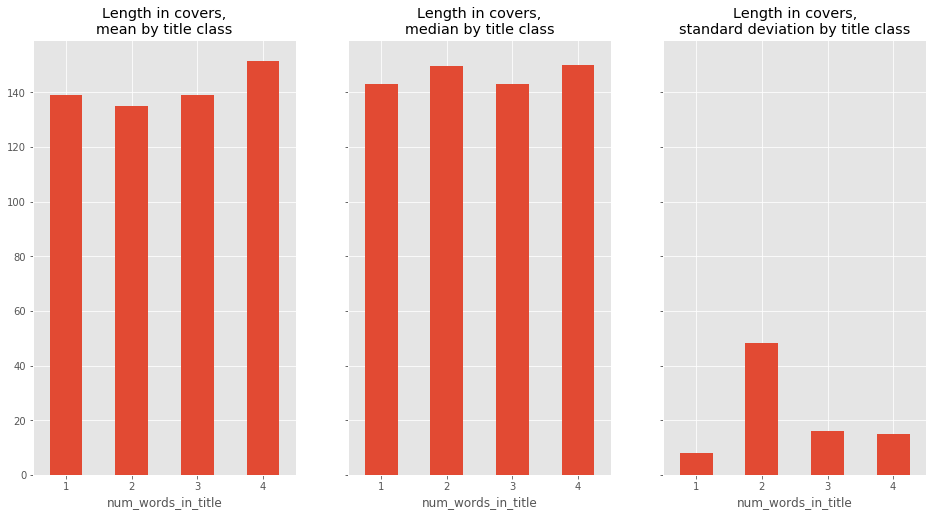

In [23]:
df_by_titles = df_cover.groupby('num_words_in_title')
fig, axs = plt.subplots(1, 3, sharey=True)
axs[0].set_title('Length in covers,\nmean by title class')
axs[1].set_title('Length in covers,\nmedian by title class')
axs[2].set_title('Length in covers,\nstandard deviation by title class')
df_by_titles['length'].aggregate(np.mean).plot(kind='bar', ax=axs[0], figsize=(16, 8), rot=0)
df_by_titles['length'].aggregate(np.median).plot(kind='bar', ax=axs[1], rot=0)
df_by_titles['length'].aggregate(np.std).plot(kind='bar', ax=axs[2], rot=0)

We see that covers don't follow the trend at all. But even the originals do it not that well... So is there a trend at all? Let's do a trick and define Words-Time Ratio (WTR) as the number of words in lyrics divided by track length in seconds.

In [24]:
df['wtr'] = df['num_words_in_lyrics'] / df['length']

First of all, let's  plot a histogram.

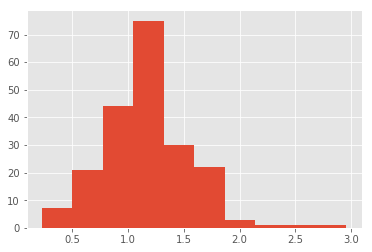

In [25]:
df['wtr'].hist()

We see that the distribution looks more or less normal. Let's look that the basic parameters of this distribution.

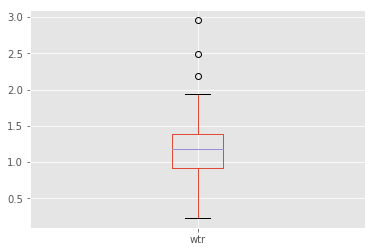

In [26]:
df['wtr'].plot.box()

In [27]:
print ('Words-Time Ratio mean: {0: 1.2f}'.format(df['wtr'].mean()))

Words-Time Ratio mean:  1.17


In [28]:
print ('Words-Time Ratio median: {0: 1.2f}'.format(df['wtr'].median()))

Words-Time Ratio median:  1.18


Let's examine the parameter according to the title class, i.e. to number of words in title.

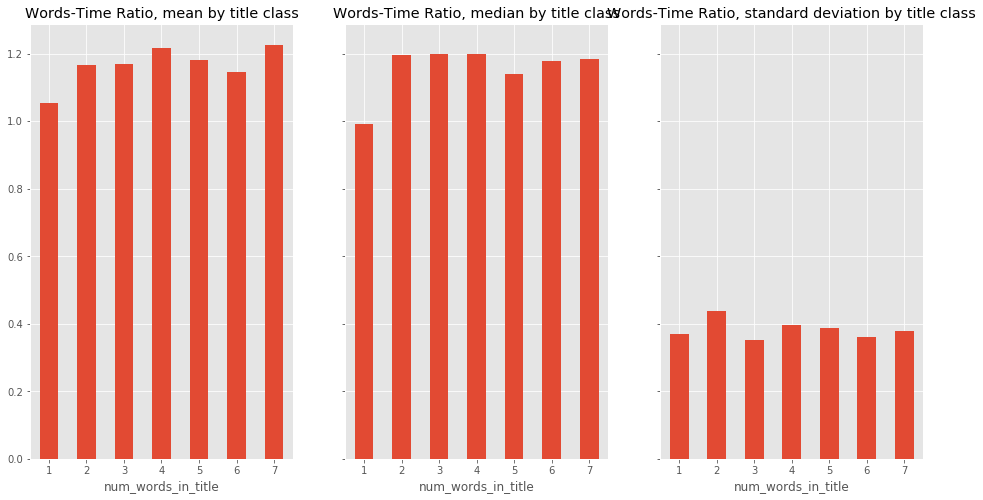

In [29]:
df_by_titles = df.groupby('num_words_in_title')
fig, axs = plt.subplots(1, 3, sharey=True)
axs[0].set_title('Words-Time Ratio, mean by title class')
axs[1].set_title('Words-Time Ratio, median by title class')
axs[2].set_title('Words-Time Ratio, standard deviation by title class')
df_by_titles['wtr'].aggregate(np.mean).plot(kind='bar', ax=axs[0], figsize=(16, 8), rot=0)
df_by_titles['wtr'].aggregate(np.median).plot(kind='bar', ax=axs[1], rot=0)
df_by_titles['wtr'].aggregate(np.std).plot(kind='bar', ax=axs[2], rot=0)

We see that means tend to increase with increasing of number of words in titles from 1 to 4. Medians rise only from 1 to 2 and then become stable. The variance isn't that big. Let's check originals and covers separately.

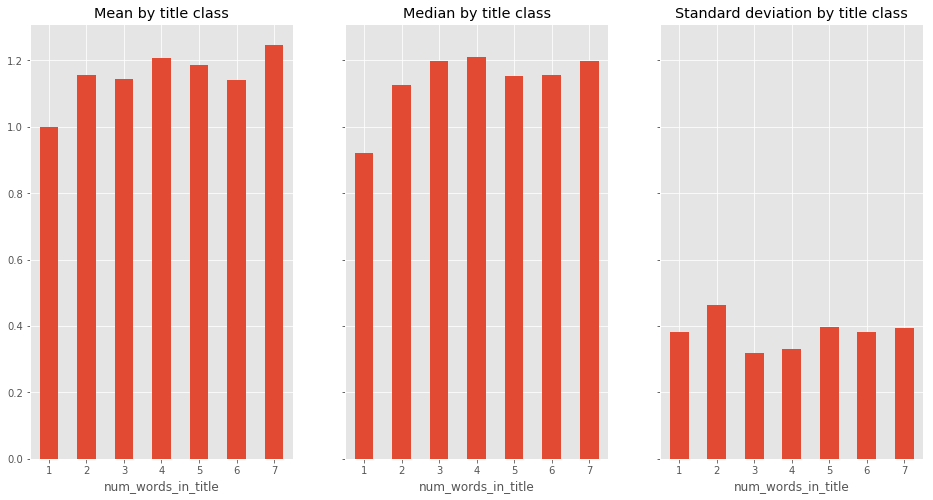

In [30]:
df_orig = df[df['cover']==False]
df_cover = df[df['cover']==True]
df_by_titles = df_orig.groupby('num_words_in_title')
fig, axs = plt.subplots(1, 3, sharey=True)
axs[0].set_title('Mean by title class')
axs[1].set_title('Median by title class')
axs[2].set_title('Standard deviation by title class')
df_by_titles['wtr'].aggregate(np.mean).plot(kind='bar', ax=axs[0], figsize=(16, 8), rot=0)
df_by_titles['wtr'].aggregate(np.median).plot(kind='bar', ax=axs[1], rot=0)
df_by_titles['wtr'].aggregate(np.std).plot(kind='bar', ax=axs[2], rot=0)

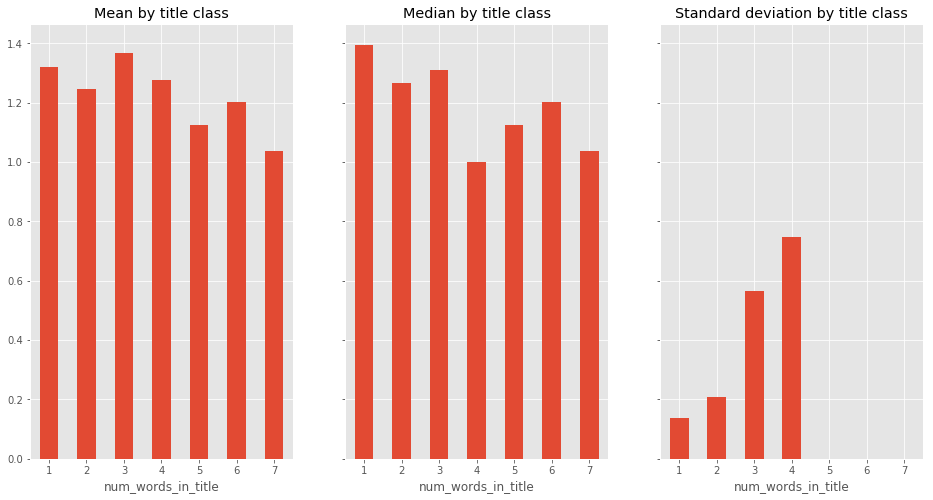

In [31]:
df_by_titles = df_cover.groupby('num_words_in_title')
fig, axs = plt.subplots(1, 3, sharey=True)
axs[0].set_title('Mean by title class')
axs[1].set_title('Median by title class')
axs[2].set_title('Standard deviation by title class')
df_by_titles['wtr'].aggregate(np.mean).plot(kind='bar', ax=axs[0], figsize=(16, 8), rot=0)
df_by_titles['wtr'].aggregate(np.median).plot(kind='bar', ax=axs[1], rot=0)
df_by_titles['wtr'].aggregate(np.std).plot(kind='bar', ax=axs[2], rot=0)

Now it is evident that both means and medians tend to increase with increasing of number of words in titles from 1 to 4 only in original songs. For covers it's not the case.

Of course, this proves nothing, as correlation is not causation.

Now we can check how WTR is changing in time.

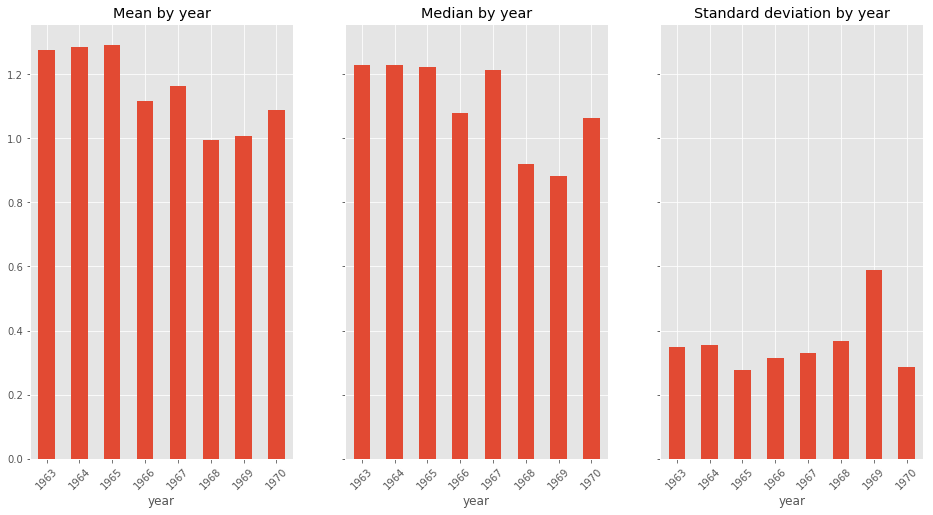

In [32]:
df_by_titles = df.groupby('year')
fig, axs = plt.subplots(1, 3, sharey=True)
axs[0].set_title('Mean by year')
axs[1].set_title('Median by year')
axs[2].set_title('Standard deviation by year')
df_by_titles['wtr'].aggregate(np.mean).plot(kind='bar', ax=axs[0], figsize=(16, 8), rot=45)
df_by_titles['wtr'].aggregate(np.median).plot(kind='bar', ax=axs[1], rot=45)
df_by_titles['wtr'].aggregate(np.std).plot(kind='bar', ax=axs[2], rot=45)

We see that WTR generally tends to decrease with time, through inconsistently. It reminds of descending in the fashion of 'two little steps up, then one big step down'. What if we divide songs again?

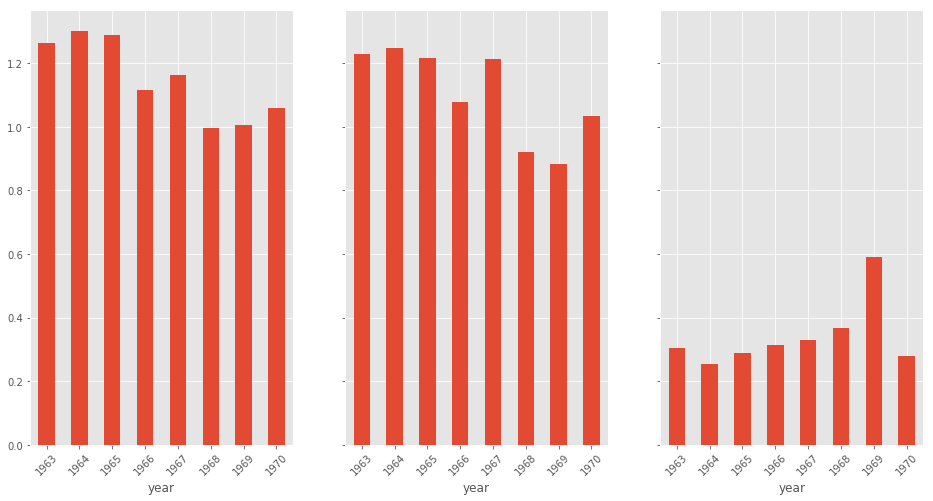

In [33]:
df_by_titles = df_orig.groupby('year')
fig, axs = plt.subplots(1, 3, sharey=True)
df_by_titles['wtr'].aggregate(np.mean).plot(kind='bar', ax=axs[0], figsize=(16, 8), rot=45)
df_by_titles['wtr'].aggregate(np.median).plot(kind='bar', ax=axs[1], rot=45)
df_by_titles['wtr'].aggregate(np.std).plot(kind='bar', ax=axs[2], rot=45)

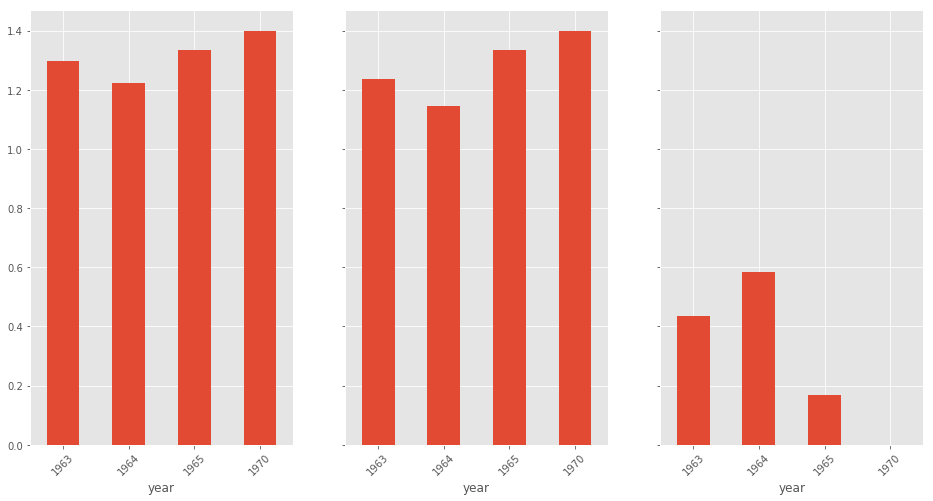

In [34]:
df_by_titles = df_cover.groupby('year')
fig, axs = plt.subplots(1, 3, sharey=True)
df_by_titles['wtr'].aggregate(np.mean).plot(kind='bar', ax=axs[0], figsize=(16, 8), rot=45)
df_by_titles['wtr'].aggregate(np.median).plot(kind='bar', ax=axs[1], rot=45)
df_by_titles['wtr'].aggregate(np.std).plot(kind='bar', ax=axs[2], rot=45)

When taking in consideration only originals, this trend is also true, while it's not so for covers. So the origin of this trend lies in originals.

<h3>CONCLUSION</h3>

If we plot number of words in lyrics against length in seconds, the character of dependency seems to be more or less linear. But the result of linear regression is not very impressive; coefficient of determination (the R squared parameter) is only 0.2. In covers only it's 0.15, while in originals 0.23.

Both number of words in lyrics and length in seconds tend to increase with increasing of number of words in titles, at least from 1 to 6. This trend is more pronounced in number of words and less so in length, and the origin of this trend lies again in originals.

If we define Words-Time Ratio (WTR) as the number of words in lyrics divided by track length in seconds, then the increasing trend is more than clear, at least in classes from 1 to 4, and again its source lies in originals.